<a href="https://colab.research.google.com/github/luigivendetta/heart_disease/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Project


In [0]:
# data manipulation libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Model Libraries from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Evaluation libraries from sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_auc_score

# Data Dictionary 


* age age in years
* sex(1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol serum cholestoral in mg/dl
* fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg resting electrocardiographic results
* thalach maximum heart rate achieved
* exang exercise induced angina (1 = yes; 0 = no)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by flourosopy
* thal  3 = normal; 6 = fixed defect; 7 = reversable defect
* target  1 or 0 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/luigivendetta/tuning_hyperparams_classification_model/master/data/heart_disease.csv")
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

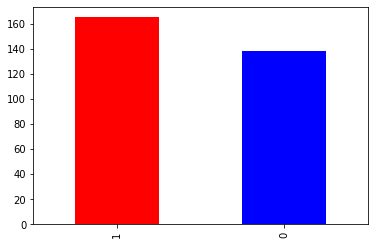

In [7]:
df["target"].value_counts().plot(kind = "bar",color=["red", "blue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Number of Persons')

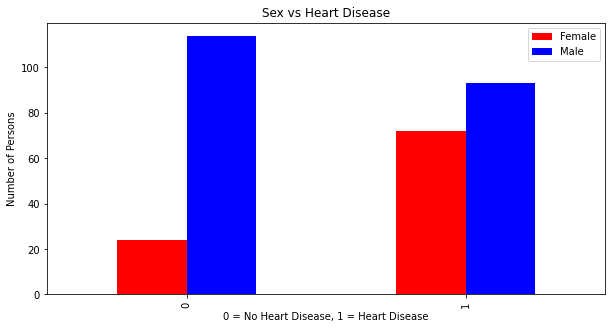

In [12]:
pd.crosstab(df["target"],df["sex"]).plot(kind = "bar", 
                                         color = ["red", "blue"], 
                                         figsize =(10,5), 
                                         title = "Sex vs Heart Disease", )
plt.legend(["Female", "Male"])
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Number of Persons")

In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

# Heart Rate vs Age

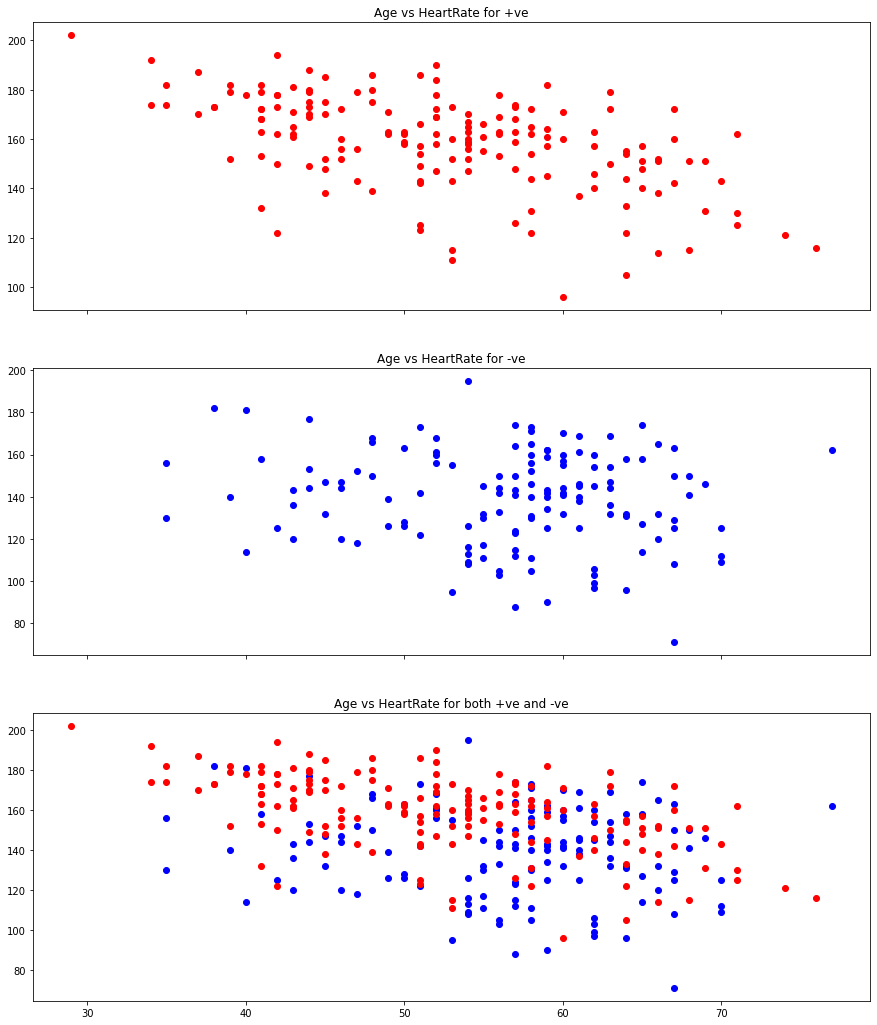

In [14]:
fig , ax = plt.subplots(ncols=1,nrows=3, figsize = (15,18), sharex= True)
ax[0].scatter(df.age[df.target == 1],
              df.thalach[df.target == 1],
             color = "red")
ax[0].set(title = "Age vs HeartRate for +ve")
ax[1].scatter(df.age[df.target == 0],
              df.thalach[df.target == 0],
              color = "blue")
ax[1].set(title = "Age vs HeartRate for -ve")
ax[2].scatter(df.age[df.target == 0],
              df.thalach[df.target == 0],
              color = "blue")
ax[2].scatter(df.age[df.target == 1],
              df.thalach[df.target == 1],
             color = "red")
ax[2].set(title = "Age vs HeartRate for both +ve and -ve");

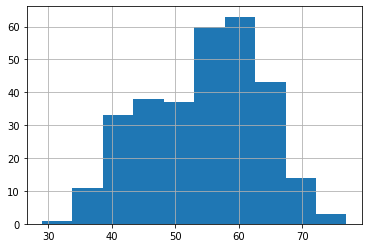

In [15]:
df["age"].hist()

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


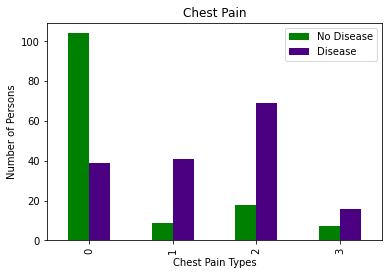

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar", color = ["green", "indigo"])
plt.xlabel("Chest Pain Types")
plt.legend(["No Disease", "Disease"]);
plt.title("Chest Pain")
plt.ylabel("Number of Persons");

In [18]:
# creating correlation matrix
df.corr() #correlation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

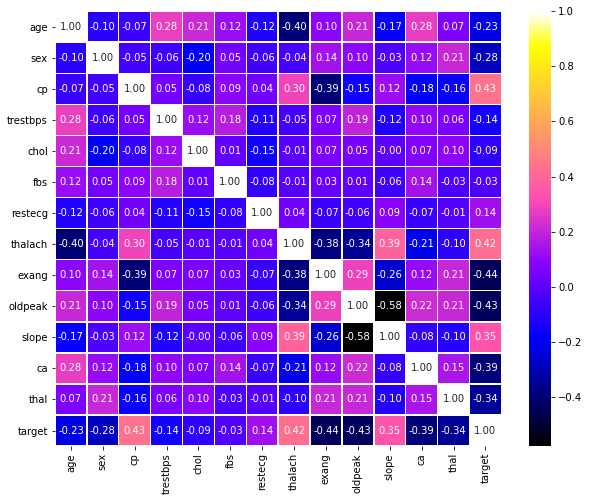

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(df.corr(),
                annot=True,
                fmt= ".2f",
                cmap="gnuplot2",
                linewidths= 0.5,
                linecolor="w")

# Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# split into feature and label
X = df.drop("target", axis = 1)
Y = df["target"]

# split into train and test
np.random.seed(61)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
# model dictionary
model = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}
# fit and score
def fit_score(models, X_train, X_test, Y_train, Y_test):
    """
    Info --> fits and score different models:
    model: dict of models to be fitted
    X_train: train data(feature)
    X_test: test data(feature)
    Y_train: train data(label)
    Y_test: test data(label)
    """
    np.random.seed(61)
    model_scores =  {}
    for name, model in models.items():
        model.fit(X_train, Y_train) #fitting the models
        model_scores[name] = model.score(X_test, Y_test) #appending in dictionary
    return model_scores

In [23]:
x = fit_score(model, X_train, X_test, Y_train, Y_test)
x

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8524590163934426}

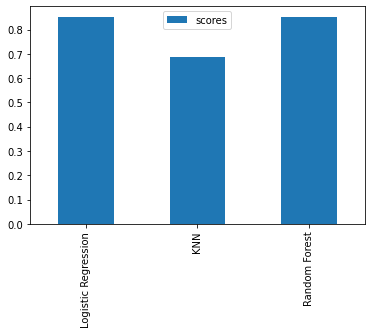

In [24]:
pd.DataFrame(x.values(), index=x.keys()).plot(kind="bar")
plt.legend(["scores"]);

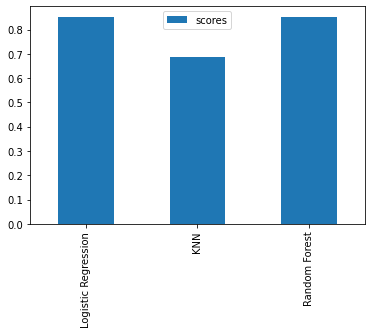

In [25]:
pd.DataFrame(x, index=["scores"]).T.plot.bar();

# Improving the Model
1. HyperParameter Tuning
2. Feature Importance

### Classification problem specific evaluation metrics:
3. Confusion Matrix
4. Cross Validation
5. Precision
6. Recall
7. F1
8. Classification Report
9. ROC Curve
10. Area Under ROC curve

# HyperParameter Tuning for KNN:


In [0]:
# storing the scores:
train_scores = []
test_scores = []
np.random.seed(61)
neighbours = list(range(1,21))
knn = KNeighborsClassifier()
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [27]:
print(train_scores, test_scores)

[1.0, 0.7933884297520661, 0.7851239669421488, 0.756198347107438, 0.7644628099173554, 0.7479338842975206, 0.731404958677686, 0.7272727272727273, 0.7024793388429752, 0.6942148760330579, 0.7024793388429752, 0.6859504132231405, 0.6859504132231405, 0.6859504132231405, 0.6983471074380165, 0.6983471074380165, 0.6900826446280992, 0.7066115702479339, 0.7066115702479339, 0.7024793388429752] [0.5737704918032787, 0.6557377049180327, 0.7049180327868853, 0.7213114754098361, 0.6885245901639344, 0.7213114754098361, 0.6557377049180327, 0.7213114754098361, 0.6557377049180327, 0.6721311475409836, 0.6229508196721312, 0.6229508196721312, 0.6557377049180327, 0.6557377049180327, 0.6065573770491803, 0.6229508196721312, 0.6229508196721312, 0.6721311475409836, 0.6229508196721312, 0.639344262295082]


Maximum Test Score: 72.13% for 4 Neighbours


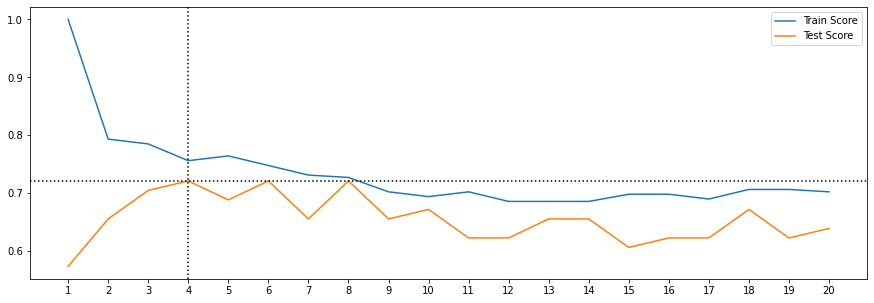

In [28]:
plt.figure(figsize=(15,5))
plt.plot(neighbours, train_scores)
plt.plot(neighbours, test_scores)
plt.xticks(np.arange(1,21,1))
plt.legend(["Train Score", "Test Score"])
plt.axhline(max(test_scores), linestyle= "dotted", c = "black")
plt.axvline(test_scores.index(max(test_scores)) + 1, linestyle = "dotted", c = "black")
print(f"Maximum Test Score: {max(test_scores)*100:.2f}% for {test_scores.index(max(test_scores)) + 1} Neighbours")
#plt.savefig("KNN model HyperParameter Tuning")

# HyperParameter Tuning with RandomizedSearchCV on:

1. `Logistic Regression`
2. `Random Forest`

In [0]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['newton-cg', 'liblinear', 'sag', "saga"]}
                #"multi_class": ['auto', 'ovr', 'multinomial']}
rf_grid = {"max_depth": np.arange(10,1000,50),
           "max_features": ["auto", "sqrt"],
           "min_samples_split": np.arange(2,21,2),
           "min_samples_leaf": np.arange(1,20,2)}

`Tuning LogisticRegression`

In [30]:
# Tuning Logistic Regression
np.random.seed(61)
# Setting up RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv= 5,
                               n_iter=20,
                               verbose=True)
# f0itting the model
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: Convergenc

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [31]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [32]:
rs_log_reg.score(X_test, Y_test)

0.8688524590163934

Tuning `RandomForest`

In [33]:
np.random.seed(61)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
rs_rf.best_params_

{'max_depth': 910,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 20}

In [35]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

In [36]:
x

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8524590163934426}

In [0]:
log_reg_grid2 = {"C": np.logspace(-4, 4, 20),
                "solver": ['newton-cg', 'lbfgs','liblinear', 'sag', "saga"],
                "multi_class": ['auto', 'ovr', 'multinomial']}

# Logistic Regression On Different Grids

In [38]:
x

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8524590163934426}

In [39]:
log_reg_grid3 = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid3,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


# Random Forest on Grid Search

In [64]:
loaded_gs_rf = pickle.load(open("GridSearchCV_RandomForest_model_hourlong.pkl", 'rb'))
loaded_gs_rf.score(X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.8360655737704918

In [0]:
y_preds = gs_log_reg.predict(X_test)

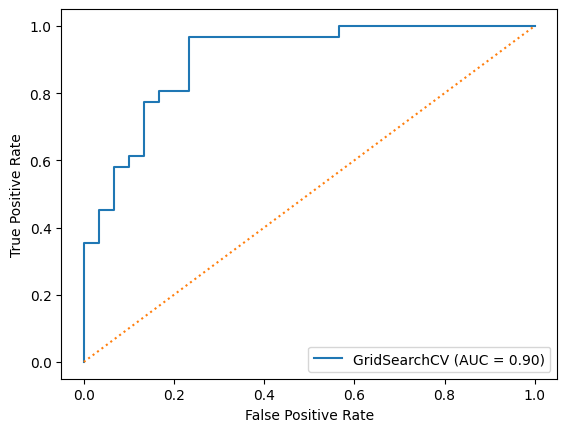

In [42]:
plt.style.use("default")
plot_roc_curve(gs_log_reg, X_test, Y_test)
plt.plot([0,1], linestyle = "dotted")

In [43]:
roc_auc_score(Y_test, y_preds)

0.8672043010752688

In [44]:
print(confusion_matrix(Y_test, y_preds))

[[23  7]
 [ 1 30]]


Text(0.5, 2.2499999999999947, 'Predicted Labels')

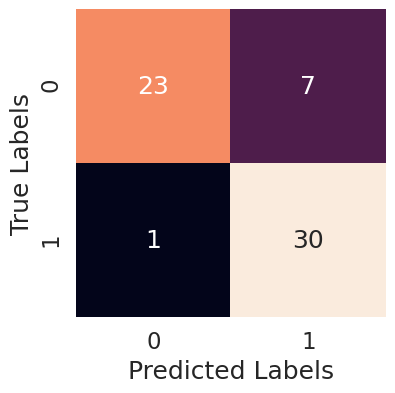

In [45]:
plt.figure(figsize=(4,4))
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(Y_test,y_preds),
           annot= True,
           cbar = False)
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [46]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.81      0.97      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [47]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
# cross validation accuracy score:
lr_cv_acc = cross_val_score(LogisticRegression(C = 0.23357214690901212, solver='liblinear'),
                     X, Y, 
                     cv=5,
                     scoring="accuracy")
lr_cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [49]:
lr_cv_acc.mean()

0.8479781420765027

In [0]:
def evaluation_metric(model, X, Y,):
    """
    Calculates score for Classification problems
    """
    clf_rep = ["accuracy",
          "precision",
          "recall",
          "f1"]
    result = {}
    for name in clf_rep:
        x = cross_val_score(model,X,Y,cv=5,scoring=name)
        result[name] = x.mean()
    return result
clf = LogisticRegression(C = 0.23357214690901212, solver='liblinear')
log_reg_report = evaluation_metric(clf, X, Y)

In [51]:
log_reg_report

{'accuracy': 0.8479781420765027,
 'f1': 0.8705403543192143,
 'precision': 0.8215873015873015,
 'recall': 0.9272727272727274}

In [52]:
log_reg_report_df = pd.DataFrame(log_reg_report, index = ["Scores"])
log_reg_report_df

,accuracy,precision,recall,f1
Scores,0.847978,0.821587,0.927273,0.87054


<Figure size 1000x400 with 0 Axes>

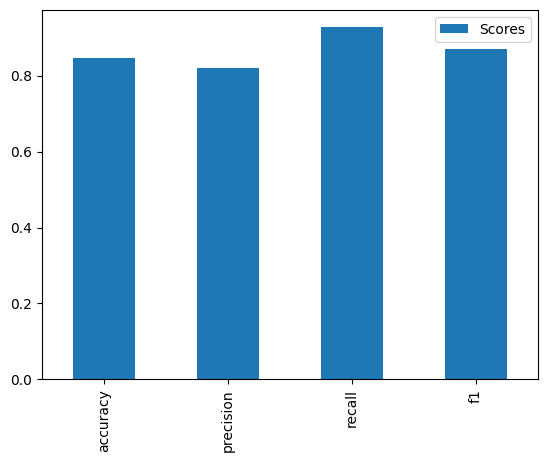

In [53]:
plt.figure(figsize = (10,4))
plt.style.use("default")
log_reg_report_df.T.plot(kind="bar");

In [54]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [55]:
clf = LogisticRegression(C= 0.23357214690901212,
                        solver = "liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
clf.coef_

array([[ 0.00787491, -0.82590556,  0.70727189, -0.0186182 , -0.0023179 ,
        -0.04327278,  0.43173841,  0.02925065, -0.53627297, -0.46570704,
         0.50250274, -0.55567272, -0.73409538]])

In [57]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.007874911797385751,
 'ca': -0.5556727205616859,
 'chol': -0.002317898993991836,
 'cp': 0.7072718897633213,
 'exang': -0.5362729738262139,
 'fbs': -0.04327277665209399,
 'oldpeak': -0.46570703539025277,
 'restecg': 0.4317384086408409,
 'sex': -0.8259055576362699,
 'slope': 0.5025027417128444,
 'thal': -0.7340953840469039,
 'thalach': 0.029250645713447793,
 'trestbps': -0.018618202281033464}

In [58]:
feature_df = pd.DataFrame(feature_dict, index = ["Values"])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Values,0.007875,-0.825906,0.707272,-0.018618,-0.002318,-0.043273,0.431738,0.029251,-0.536273,-0.465707,0.502503,-0.555673,-0.734095


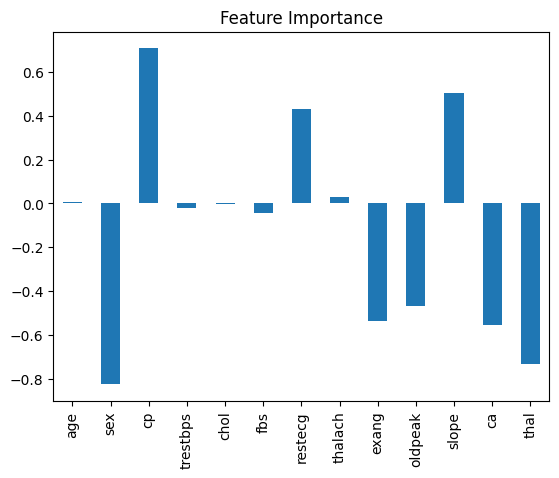

In [59]:
feature_df.T.plot.bar(legend=False, title="Feature Importance");

In [60]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
